# IMPORT

In [1]:
import requests
from sklearn import metrics
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns

from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor


import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split


from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import roc_auc_score

from nltk.corpus import stopwords
stop_words = stopwords.words("english")

import warnings
warnings.filterwarnings('ignore')

c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
df = pd.read_csv('glassdoor_jobs.csv')

In [3]:
df.shape

(956, 15)

In [4]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


# Data Cleaning and Feature  Engineering

In [5]:
df.drop(['Unnamed: 0'], axis =1,inplace=True)

## Salary

In [6]:
# Ignoring the NaN values
df = df[df['Salary Estimate'] != '-1']

In [7]:
# Removing  string from salary feautre
df["Salary Estimate"] = df["Salary Estimate"].apply(lambda x: x.split("(")[0])

In [8]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck"
951,Senior Data Engineer,$72K-$133K,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini"
952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1
953,Data Science Manager,$95K-$160K,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1


In [9]:
# Feature Creation 
df["hour"] = df["Salary Estimate"].apply(lambda x: 1 if "hour" in x.lower() else 0)

In [10]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hour
0,Data Scientist,$53K-$91K,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0
1,Healthcare Data Scientist,$63K-$112K,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0
2,Data Scientist,$80K-$90K,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0
3,Data Scientist,$56K-$97K,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0
4,Data Scientist,$86K-$143K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0
951,Senior Data Engineer,$72K-$133K,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0
952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0
953,Data Science Manager,$95K-$160K,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0


In [11]:
# Removing  string from salary feautre
df["Salary Estimate"] = df["Salary Estimate"].str.replace("K","").str.replace("$","").str.replace("Employer","").str.replace("Provided Salary:","").str.replace("Per Hour","")

In [12]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hour
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0
951,Senior Data Engineer,72-133,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0
952,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0
953,Data Science Manager,95-160,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0


In [13]:
# Taking average Salary
df["Salary Estimate"] = df["Salary Estimate"].apply(lambda x: (float(x.split("-")[0]) + float(x.split("-")[1]))/2 if len(str(x).split("-"))==2 else x)

In [14]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hour
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0
3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0
4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,"Sr Scientist, Immuno-Oncology - Oncology",84.5,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0
951,Senior Data Engineer,102.5,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0
952,"Project Scientist - Auton Lab, Robotics Institute",73.5,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0
953,Data Science Manager,127.5,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0


In [15]:
# Feature Creation
df.loc[df['hour'] == 1, 'Salary Estimate'] = df["Salary Estimate"]*2

## Company Age

In [16]:
# Feature Creation
df["year"] = df["Founded"].apply(lambda x: 2021-x if x!=-1 else x)

## State

In [17]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hour,year
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,48
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,37
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,11
3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,56
4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,"Sr Scientist, Immuno-Oncology - Oncology",84.5,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0,191
951,Senior Data Engineer,102.5,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0,15
952,"Project Scientist - Auton Lab, Robotics Institute",73.5,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0,37
953,Data Science Manager,127.5,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0,-1


In [18]:
df["code"] = df["Location"].apply(lambda x: x.split(",")[1])

In [19]:
# Feature Creation
df['head_state'] = np.where(df['Headquarters']==df["Location"], 1, 0)

## Company Name

In [20]:
# Removing Rating numbers from Company Name Feature
df["Company Name"] = df["Company Name"].str.extract('([a-zA-Z ]+)')

In [21]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hour,year,code,head_state
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,48,NM,0
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,37,MD,0
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,11,FL,1
3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,56,WA,1
4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,23,NY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,"Sr Scientist, Immuno-Oncology - Oncology",84.5,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0,191,MA,0
951,Senior Data Engineer,102.5,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0,15,TN,0
952,"Project Scientist - Auton Lab, Robotics Institute",73.5,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0,37,PA,1
953,Data Science Manager,127.5,Data Science ManagerResponsibilities:\n\nOvers...,3.2,Numeric,"Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0,-1,PA,0


## Job Summary

In [22]:
# Feature Creation
df["Job Description"] = df["Job Description"].str.replace("\n","")
df["Job_len"] = df["Job Description"].apply(lambda x: len(x))

In [23]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hour,year,code,head_state,Job_len
0,Data Scientist,72.0,"Data ScientistLocation: Albuquerque, NMEducati...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,48,NM,0,2517
1,Healthcare Data Scientist,87.5,What You Will Do:I. General SummaryThe Healthc...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,37,MD,0,4738
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,11,FL,1,3427
3,Data Scientist,76.5,*Organization and Job ID**Job ID: 310709Direct...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,56,WA,1,3840
4,Data Scientist,114.5,Data ScientistAffinity Solutions / Marketing C...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,23,NY,1,2708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,"Sr Scientist, Immuno-Oncology - Oncology",84.5,Site Name: USA - Massachusetts - CambridgePost...,3.9,GSK,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0,191,MA,0,6105
951,Senior Data Engineer,102.5,THE CHALLENGEEventbrite has a world-class data...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0,15,TN,0,6093
952,"Project Scientist - Auton Lab, Robotics Institute",73.5,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0,37,PA,1,3049
953,Data Science Manager,127.5,Data Science ManagerResponsibilities:Oversee a...,3.2,Numeric,"Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0,-1,PA,0,1606


In [24]:
# Feature Creation

df['python'] = df["Job Description"].apply(lambda x: 1 if "python" in x.lower() else 0)
df['aws'] = df["Job Description"].apply(lambda x: 1 if "aws" in x.lower() else 0)
df['azure'] = df["Job Description"].apply(lambda x: 1 if "azure" in x.lower() else 0)
df['visualization'] = df["Job Description"].apply(lambda x: 1 if "visualization" in x.lower() else 0)
df['analysis'] = df["Job Description"].apply(lambda x: 1 if "analysis" in x.lower() else 0)
df['excel'] = df["Job Description"].apply(lambda x: 1 if "excel" in x.lower() else 0)
df['bi'] = df["Job Description"].apply(lambda x: 1 if "bi" in x.lower() else 0)

## Title

In [25]:
def title_encode(x):
    if 'data scientist' in x.lower():
        return 'data scientist'
    elif 'analyst' in x.lower():
        return 'analyst'
    elif 'analytics' in x.lower():
        return 'analyst'
    elif 'machine learning' in x.lower():
        return 'ml'
    elif 'manager' in x.lower():
        return 'manager'
    elif 'python' in x.lower():
        return 'python'
    elif 'big data' in x.lower():
        return "big data"
    else:
        return 'other'

In [26]:
df["job_focus"] = df["Job Title"].apply(title_encode)

In [27]:
df["job_focus"].value_counts()

other             294
data scientist    279
analyst           131
ml                 22
manager             8
big data            6
python              2
Name: job_focus, dtype: int64

In [28]:
def exp(x):
    if "senior" in x.lower() or "manager" in x.lower() or "director" in x.lower() or "lead" in x.lower() or "sr" in x.lower():
        return "senior"
    elif "junior" in x.lower() or "graduate" in x.lower() or "intern" in x.lower() or "jr" in x.lower() :
        return "junior"
    else:
        return "other"

In [29]:
# Feature Creation
df["experience"] = df["Job Title"].apply(exp)

In [30]:
df["experience"].value_counts()

other     497
senior    235
junior     10
Name: experience, dtype: int64

In [31]:
df["experience"].to_frame()

,experience
0,other
1,other
2,other
3,other
4,other
...,...
950,senior
951,senior
952,other
953,senior


In [32]:
df.to_csv('cleaned_data.csv',index = False)

# EDA

In [33]:
df = pd.read_csv('cleaned_data.csv')

In [34]:
df.shape

(742, 28)

In [35]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Job_len,python,aws,azure,visualization,analysis,excel,bi,job_focus,experience
0,Data Scientist,72.0,"Data ScientistLocation: Albuquerque, NMEducati...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,2517,1,0,0,1,1,1,1,data scientist,other
1,Healthcare Data Scientist,87.5,What You Will Do:I. General SummaryThe Healthc...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,4738,1,0,0,1,1,0,1,data scientist,other
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,3427,1,0,0,1,1,1,1,data scientist,other
3,Data Scientist,76.5,*Organization and Job ID**Job ID: 310709Direct...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,3840,1,0,0,0,1,0,1,data scientist,other
4,Data Scientist,114.5,Data ScientistAffinity Solutions / Marketing C...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,2708,1,0,0,0,1,1,1,data scientist,other


## Summary

In [36]:
df.describe()

,Salary Estimate,Rating,Founded,hour,year,head_state,Job_len,python,aws,azure,visualization,analysis,excel,bi
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,101.434636,3.618868,1837.154987,0.032345,47.524259,0.557951,3828.919137,0.528302,0.237197,0.072776,0.257412,0.595687,0.522911,0.978437
std,37.546122,0.801210,497.183763,0.177034,53.839080,0.496965,1509.298887,0.499535,0.425651,0.259944,0.437503,0.491090,0.499812,0.145351
min,15.500000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.500000,3.300000,1939.000000,0.000000,12.000000,0.000000,2761.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,97.500000,3.700000,1988.000000,0.000000,25.000000,1.000000,3699.500000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,122.500000,4.000000,2007.000000,0.000000,60.000000,1.000000,4700.750000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,254.000000,5.000000,2019.000000,1.000000,277.000000,1.000000,9956.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Column Name

In [37]:
df.columns.values

array(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'hour', 'year', 'code', 'head_state', 'Job_len',
       'python', 'aws', 'azure', 'visualization', 'analysis', 'excel',
       'bi', 'job_focus', 'experience'], dtype=object)

## Number of Categorical Feature

In [38]:
categorical_features = df.select_dtypes("object").columns
categorical_features= list(set(categorical_features))
print("Number of Categorical Feature = ",len(categorical_features))

Number of Categorical Feature =  14


In [39]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Sector and number of categories are 25
The feature is experience and number of categories are 3
The feature is Location and number of categories are 200
The feature is Job Description and number of categories are 463
The feature is Size and number of categories are 9
The feature is Job Title and number of categories are 264
The feature is Revenue and number of categories are 14
The feature is job_focus and number of categories are 7
The feature is code and number of categories are 38
The feature is Industry and number of categories are 60
The feature is Competitors and number of categories are 128
The feature is Headquarters and number of categories are 198
The feature is Type of ownership and number of categories are 11
The feature is Company Name and number of categories are 342


## Number of Numerical Feature

In [40]:
numerical_features = df.select_dtypes("number").columns
numCols= list(set(numerical_features))
print("Number of Numerical Feature = ",len(numerical_features))

Number of Numerical Feature =  14


In [41]:
numerical_features

Index(['Salary Estimate', 'Rating', 'Founded', 'hour', 'year', 'head_state',
       'Job_len', 'python', 'aws', 'azure', 'visualization', 'analysis',
       'excel', 'bi'],
      dtype='object')

## Correlation

Since it's a regression problem we'll need to take care of multicollinearity if it exists in our data

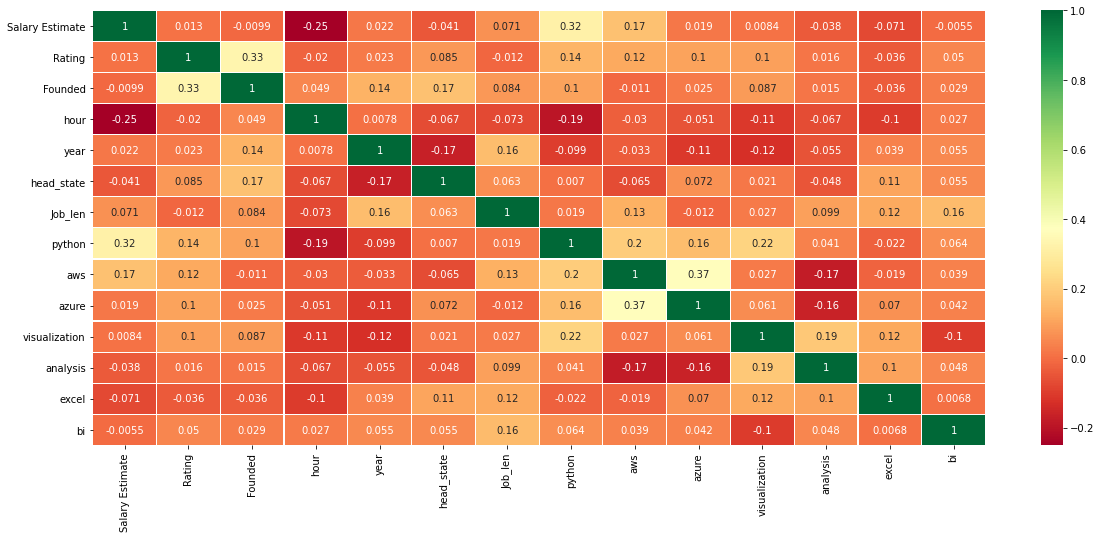

In [42]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.show()

There is no issue of multicollinearity in our data

## Job Description

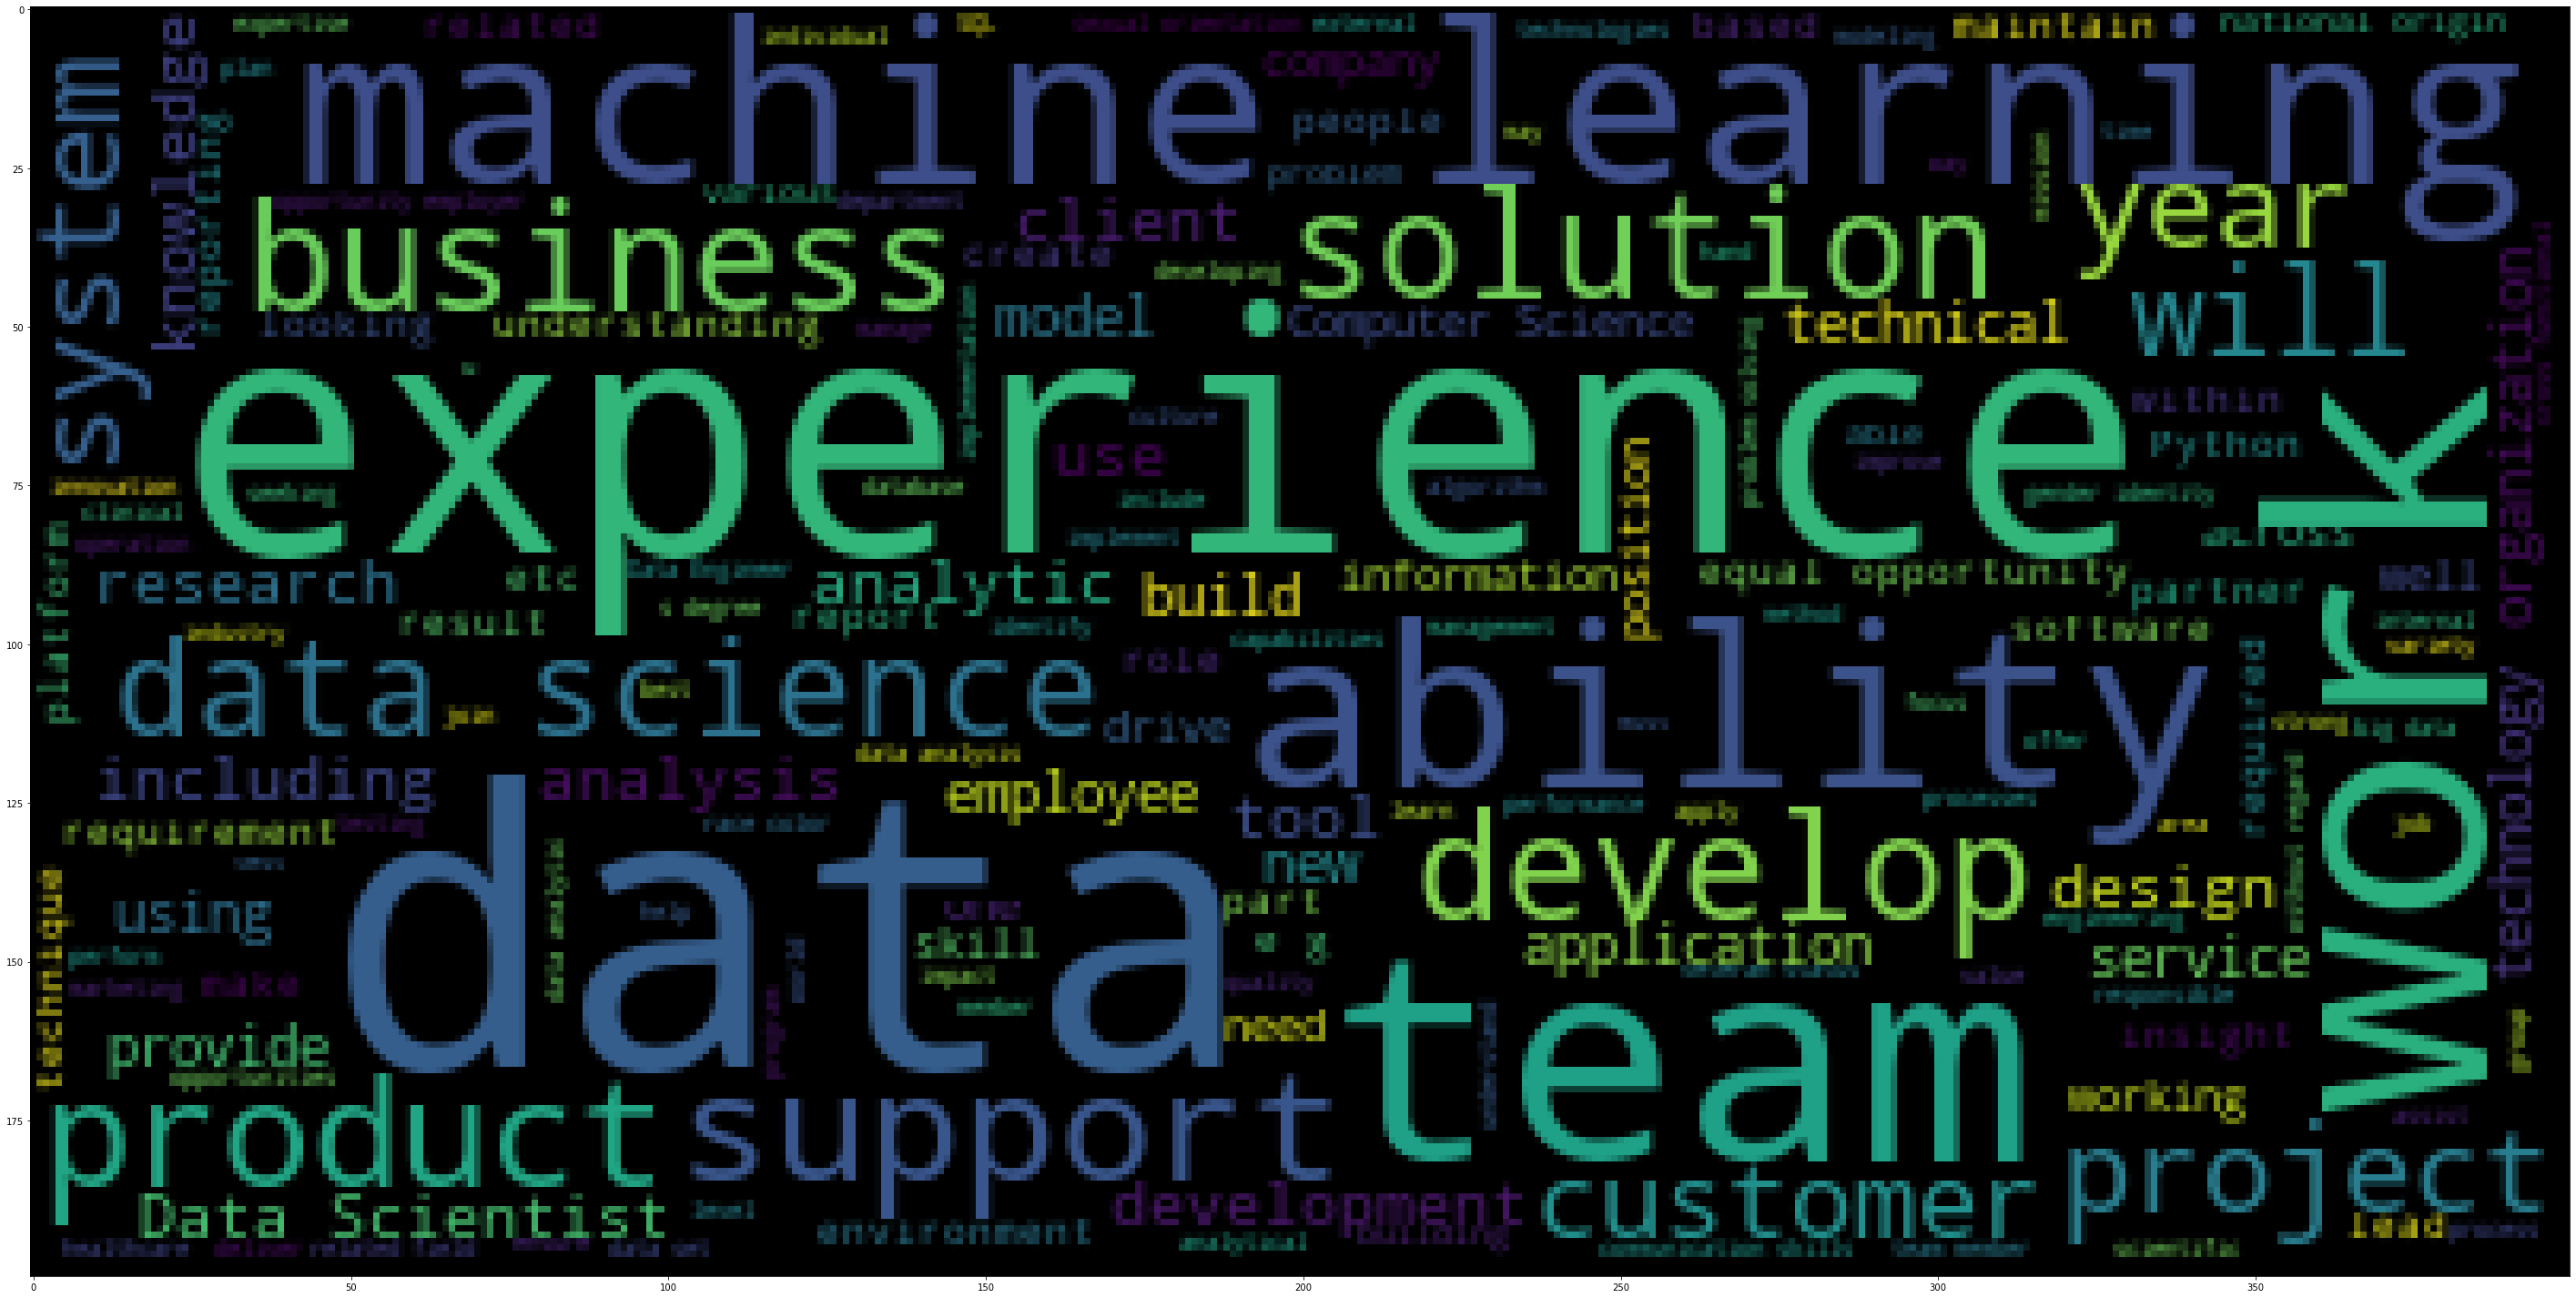

In [43]:
plt.figure(figsize=(50,50))
wc = WordCloud().generate(" ".join(df["Job Description"]))                                                                       
plt.imshow(wc)

## Rating 

<AxesSubplot:xlabel='Rating', ylabel='count'>

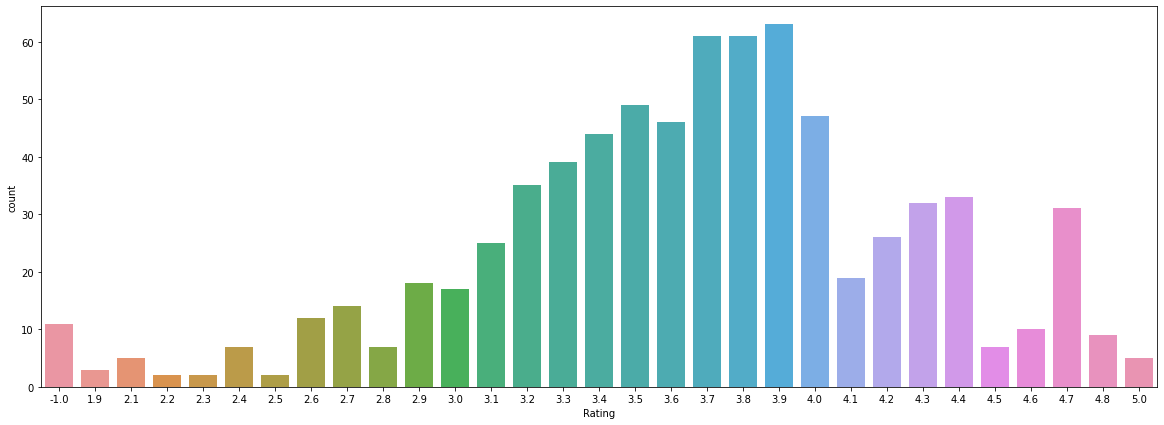

In [44]:
plt.figure(figsize = (20 , 7))
sns.countplot(df["Rating"])

Most of the ratings are between 3.7 to 3.9

## Salary and Rating

<AxesSubplot:xlabel='Rating', ylabel='Salary'>

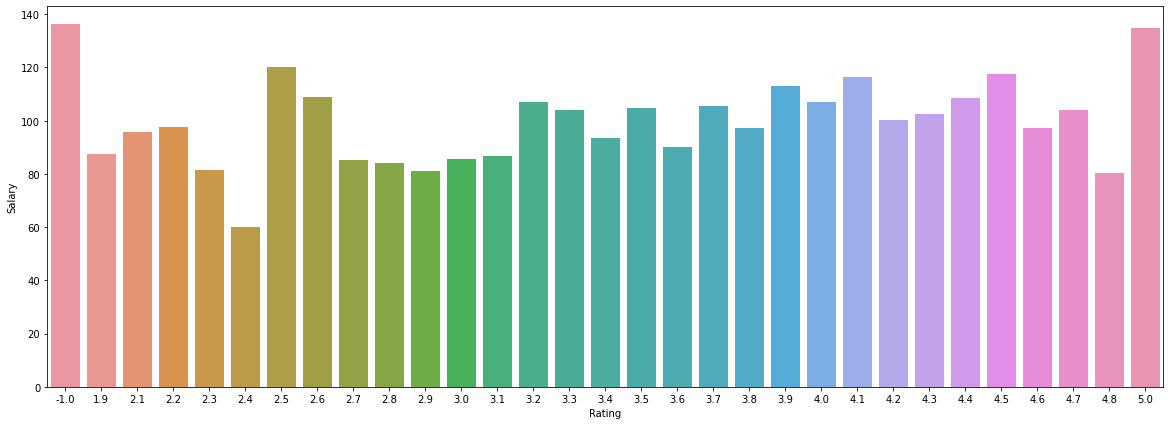

In [45]:
rating_salary = df.groupby("Rating").mean()["Salary Estimate"]
x = rating_salary.index
y = rating_salary.values
plt.figure(figsize = (20 , 7))
plt.ylabel("Salary")
plt.style.use('bmh')
sns.barplot(x,y)

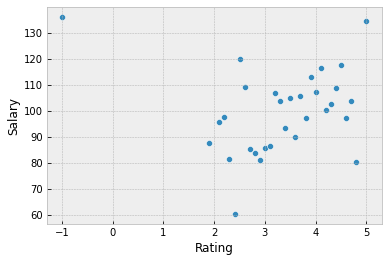

In [46]:
sns.scatterplot(x,y)
plt.ylabel("Salary")
plt.style.use('ggplot')

## Salary

<AxesSubplot:xlabel='Salary Estimate', ylabel='Count'>

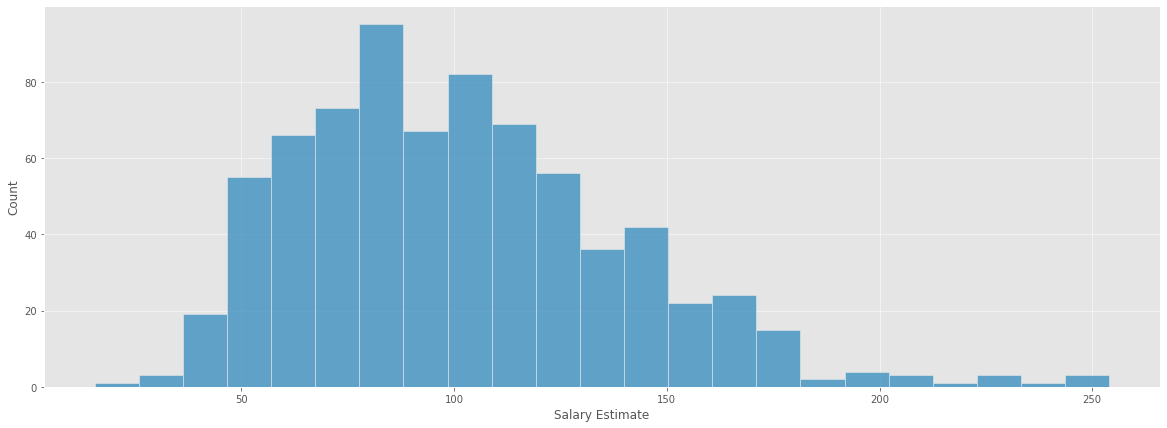

In [47]:
plt.figure(figsize = (20 , 7))
sns.histplot(data=df,x="Salary Estimate")

In [48]:
df["Salary Estimate"].median()

97.5

Average Salary is in the range of 80k - 120k <br>
Very few people have more than 200k Salary <br>

Let's  dive in more 

In [49]:
df[df["Salary Estimate"]>200][["Job Title","Type of ownership","Salary Estimate","experience"]]

,Job Title,Type of ownership,Salary Estimate,experience
103,Senior Data Scientist,Company - Private,237.5,senior
176,Principal Data Scientist with over 10 years ex...,Company - Private,225.0,other
195,Lead Data Engineer,Company - Private,205.0,senior
266,Principal Data Scientist with over 10 years ex...,Company - Private,225.0,other
330,Lead Data Engineer,Company - Private,205.0,senior
354,"Director II, Data Science - GRM Actuarial",Company - Private,254.0,senior
429,Principal Machine Learning Scientist,Subsidiary or Business Segment,232.5,other
476,Lead Data Engineer,Company - Private,205.0,senior
528,"Director II, Data Science - GRM Actuarial",Company - Private,254.0,senior
613,Data Science Manager,Company - Private,221.5,senior


All the people whose salaries are above 200k are Director or Senior officals.

## Age

<AxesSubplot:xlabel='year'>

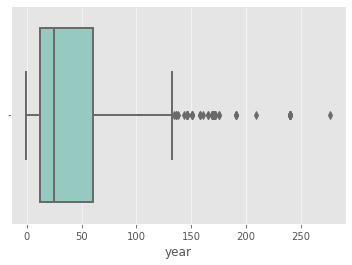

In [50]:
sns.boxplot(df["year"],palette="Set3")

Many Companies are less than 100 years old

['Takeda Pharmaceuticals' 'Pfizer' 'The Hanover Insurance Group'
 'Sartorius' 'Swiss Re' 'Carmeuse' 'Church ' 'MassMutual'
 'BWX Technologies' 'Sotheby' 'Associated Banc' 'Santander' 'Citi' 'GSK']


<AxesSubplot:xlabel='count', ylabel='Sector'>

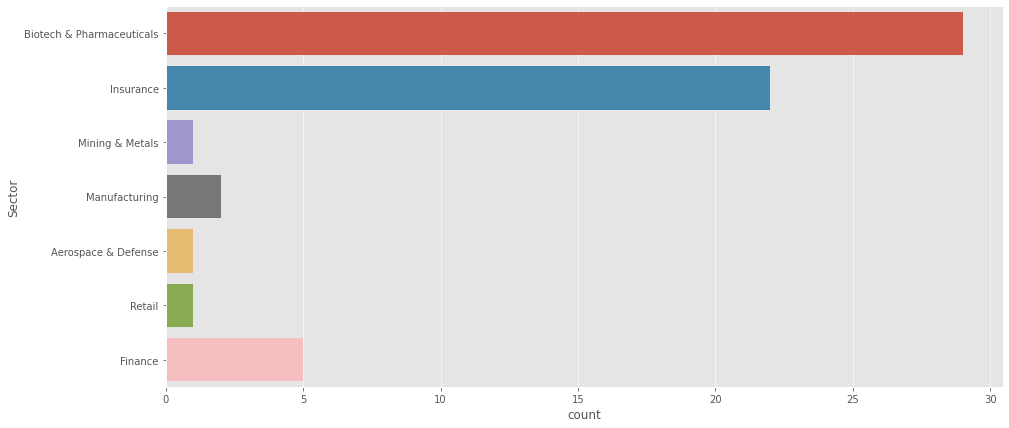

In [51]:
print(df[df["year"]>150]["Company Name"].unique())
sec = df[df["year"]>150]["Sector"]
plt.figure(figsize = (15 , 7))
sns.countplot(y=sec)


Companies which are more than 150 year old

## Revenue

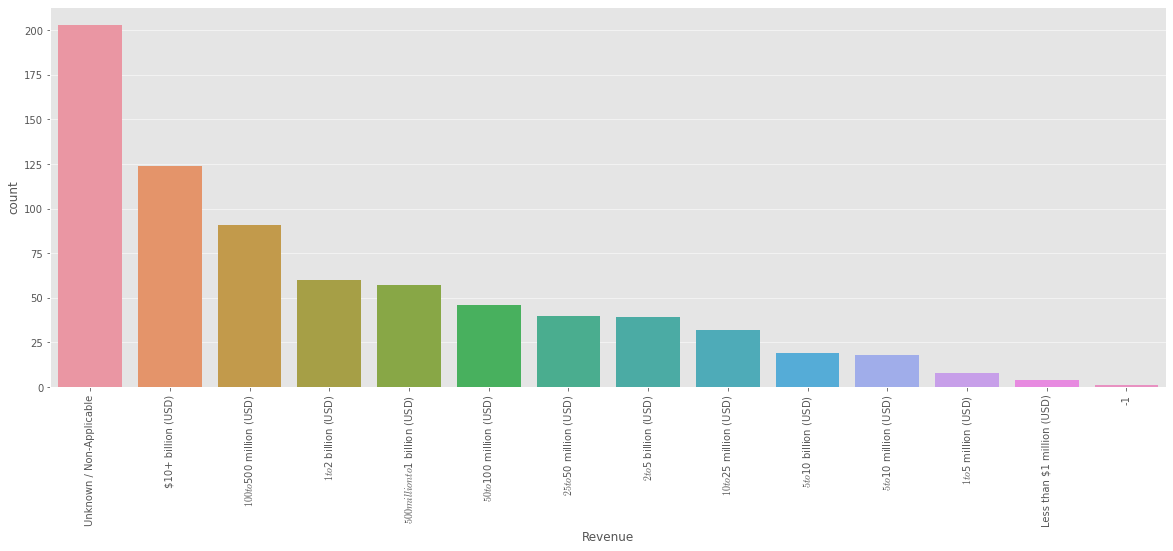

In [52]:
plt.figure(figsize = (20 , 7))
c = sns.countplot(df["Revenue"],order = df['Revenue'].value_counts().index)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
plt.show()

Bigger Companies are hiring more  data scientist

## Job State

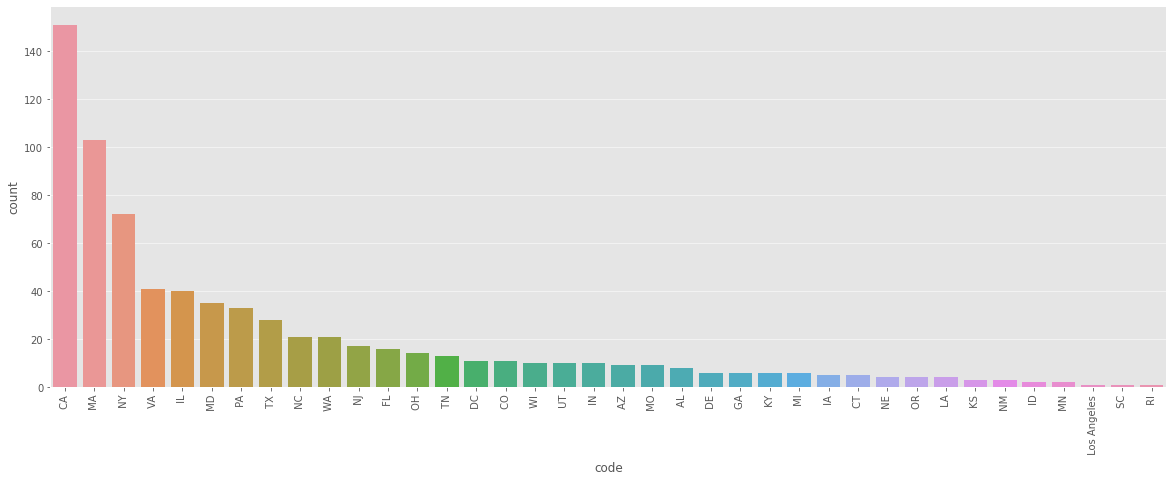

In [53]:
plt.figure(figsize = (20 , 7))
c = sns.countplot(df["code"],order = df['code'].value_counts().index)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
plt.show()

Job vaccanccy in CA is huge

## Job State and Salary

In [54]:
grouped = df.groupby('code').mean().reset_index()
grouped.sort_values('Salary Estimate', ascending=False)[["code","Salary Estimate"]]

,code,Salary Estimate
2,CA,123.619205
11,IL,116.662500
5,DC,110.181818
16,Los Angeles,107.500000
17,MA,107.412621
24,NJ,104.558824
19,MI,100.250000
30,RI,100.000000
26,NY,98.652778
22,NC,98.452381


<AxesSubplot:xlabel='code', ylabel='Salary Estimate'>

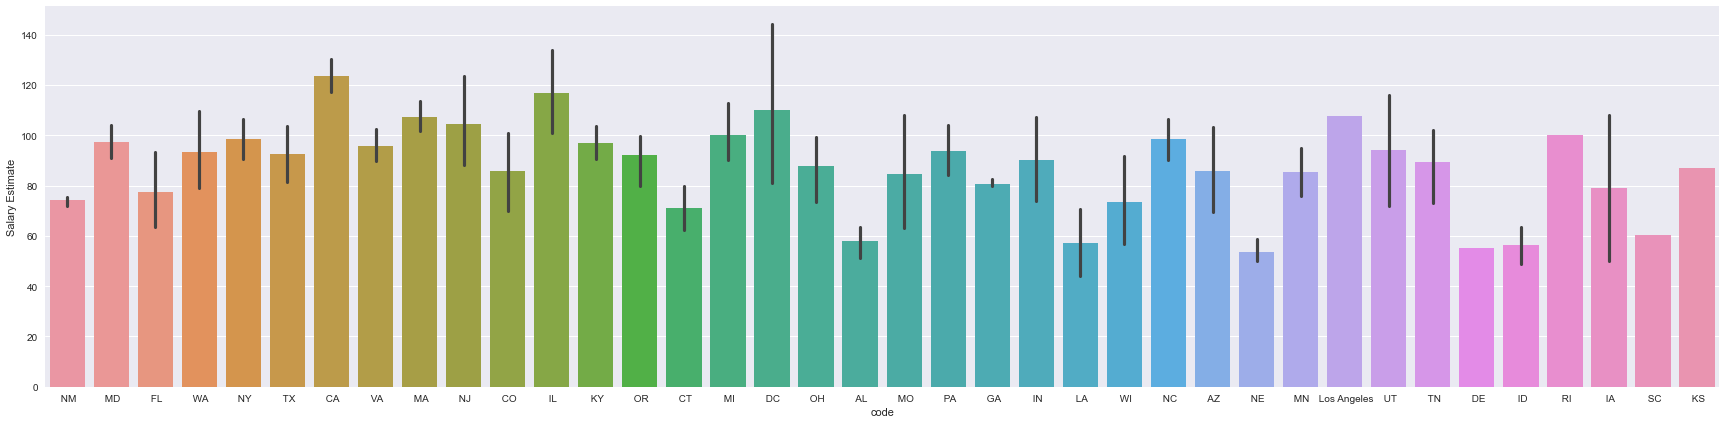

In [55]:
plt.figure(figsize = (30 , 7))
plt.style.use('seaborn')
sns.barplot(x="code",y="Salary Estimate",data = df)

From above 2 results we can see <br>
Average salary is also more in CA

## Headquarters

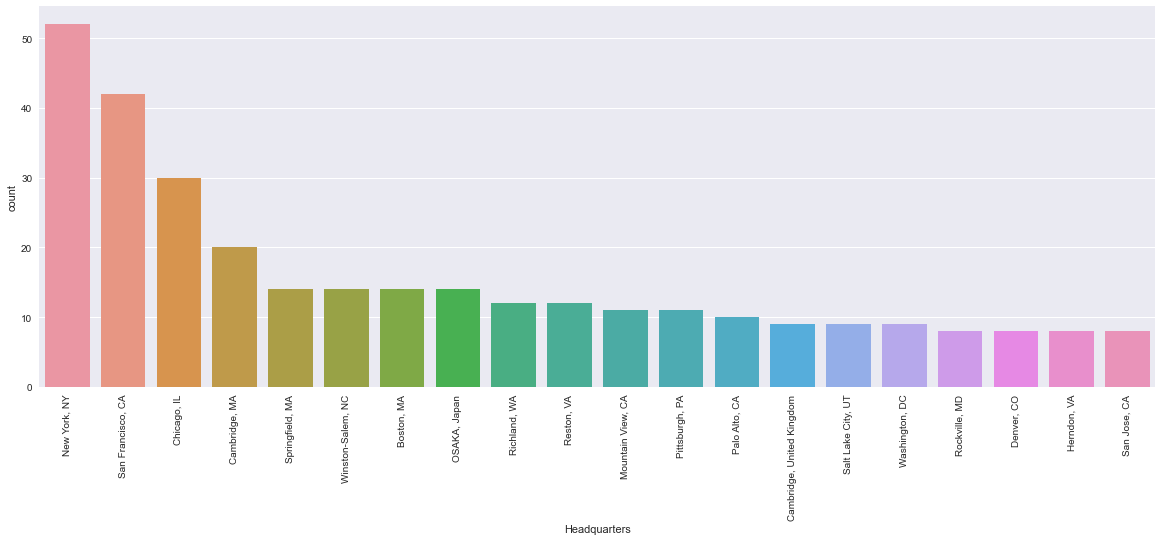

In [56]:
plt.figure(figsize = (20 , 7))
c = sns.countplot(df["Headquarters"],order = df['Headquarters'].value_counts().iloc[:20].index)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
plt.show()

## Headquartes and Salary

In [57]:
headquartes_salary = df[df["head_state"]==1][["Salary Estimate","Headquarters","code"]]

In [58]:
grouped = headquartes_salary.groupby('code').mean().reset_index()
grouped.sort_values('Salary Estimate', ascending=False)[["code","Salary Estimate"]]

,code,Salary Estimate
2,CA,124.136364
11,IN,110.900000
10,IL,110.333333
20,NJ,109.400000
15,MI,107.333333
4,DC,106.916667
13,MA,102.200000
18,NC,100.750000
24,RI,100.000000
25,TN,99.700000


<AxesSubplot:xlabel='code', ylabel='Salary Estimate'>

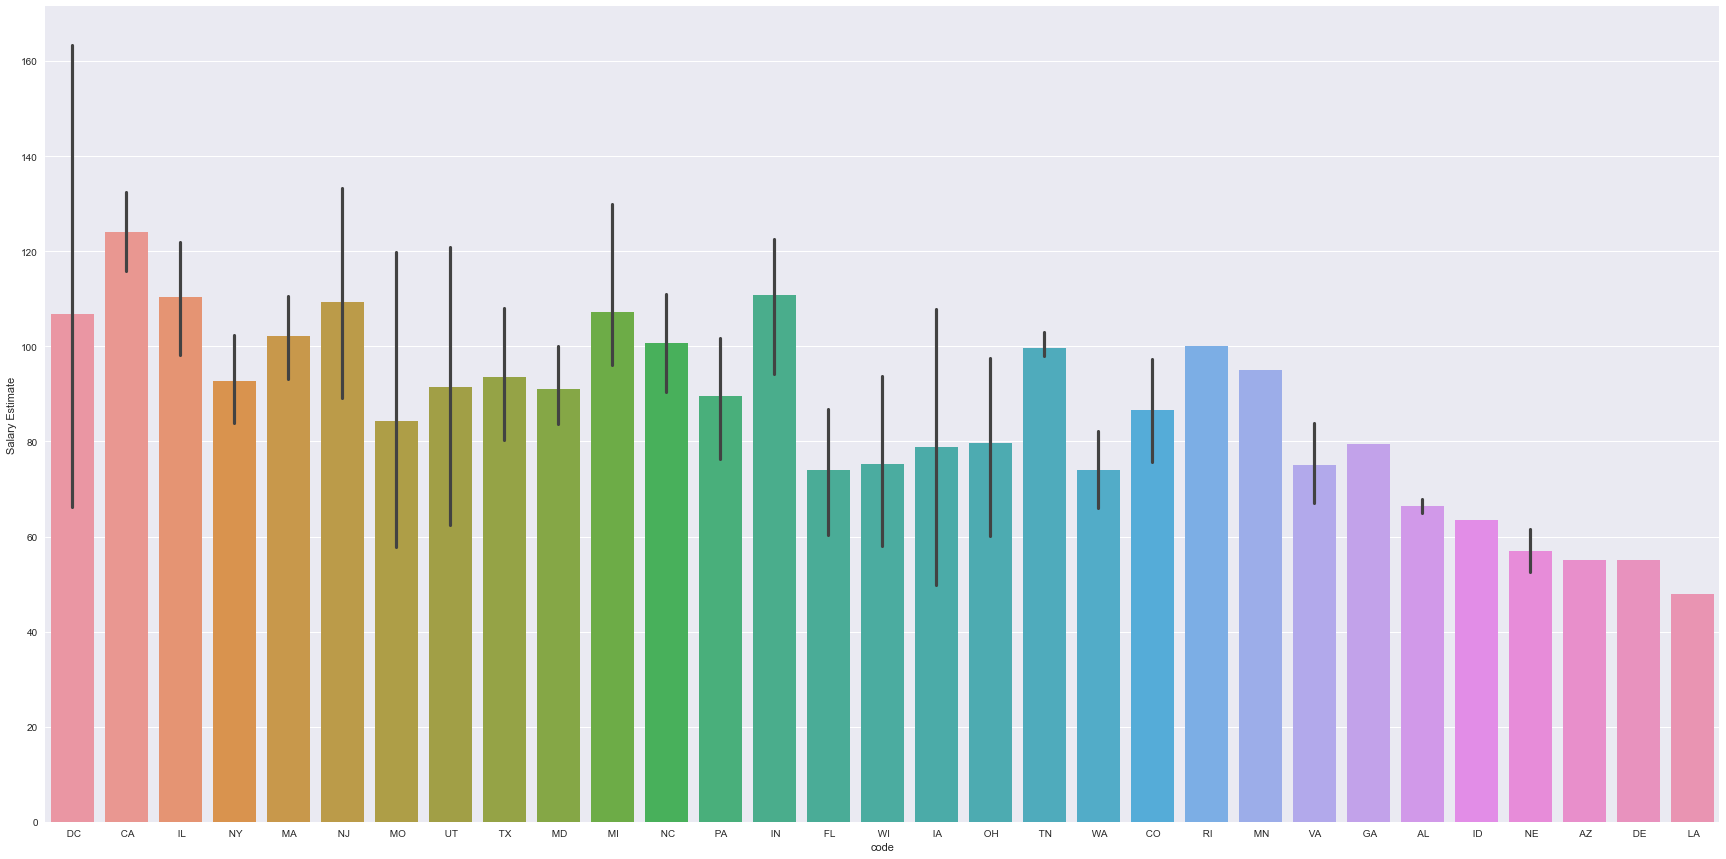

In [59]:
plt.figure(figsize = (30 , 15))
sns.barplot(x="code",y="Salary Estimate",data = headquartes_salary.sort_values("Salary Estimate", ascending = False))

## Job Focus

Text(0.5, 1.0, 'Job Title Percentage')

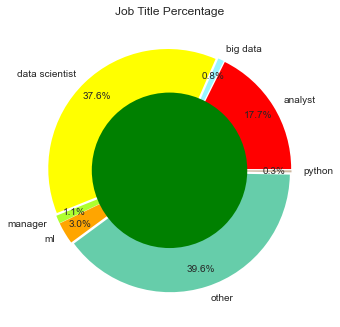

In [60]:
y = df.groupby("job_focus").count()["Job Title"].values.tolist()
x = df.groupby("job_focus").count()["Job Title"].index.tolist()
colors = ['#FF0000', '#98F5FF', '#FFFF00', '#ADFF2F', '#FFA500','#66CDAA','#CDB79E']
explode = (0.02, 0.02, 0.02, 0.02, 0.02,0.02,0.02)
plt.pie(y,  labels=x,autopct='%1.1f%%',colors=colors,explode=explode,pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.65, fc='green')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Job Title Percentage')

## Job Title and Salary

In [61]:
grouped = df.groupby('job_focus').median()["Salary Estimate"].reset_index()
grouped.sort_values('Salary Estimate', ascending=False)

,job_focus,Salary Estimate
4,ml,124.00
2,data scientist,113.50
1,big data,110.75
6,python,94.50
5,other,92.00
3,manager,85.25
0,analyst,62.50


<AxesSubplot:xlabel='job_focus', ylabel='Salary Estimate'>

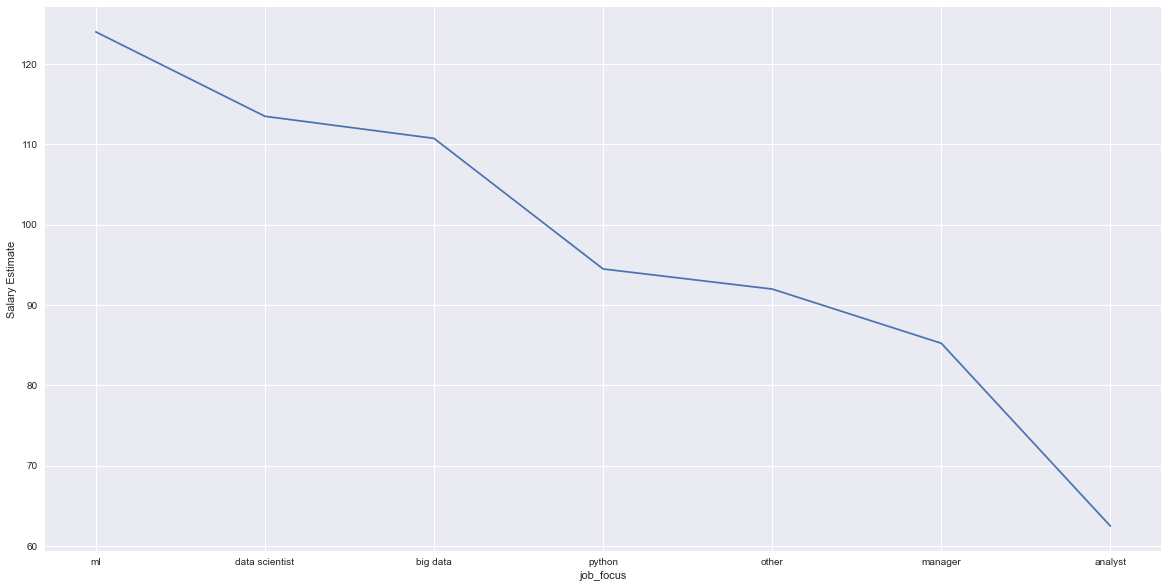

In [62]:
plt.figure(figsize = (20 , 10))
grouped = df.groupby('job_focus').median()["Salary Estimate"].reset_index()
grouped.sort_values('Salary Estimate', ascending=False)
x = grouped.sort_values('Salary Estimate', ascending=False)["job_focus"]
y =  grouped.sort_values('Salary Estimate', ascending=False)["Salary Estimate"]
sns.lineplot(x,y)

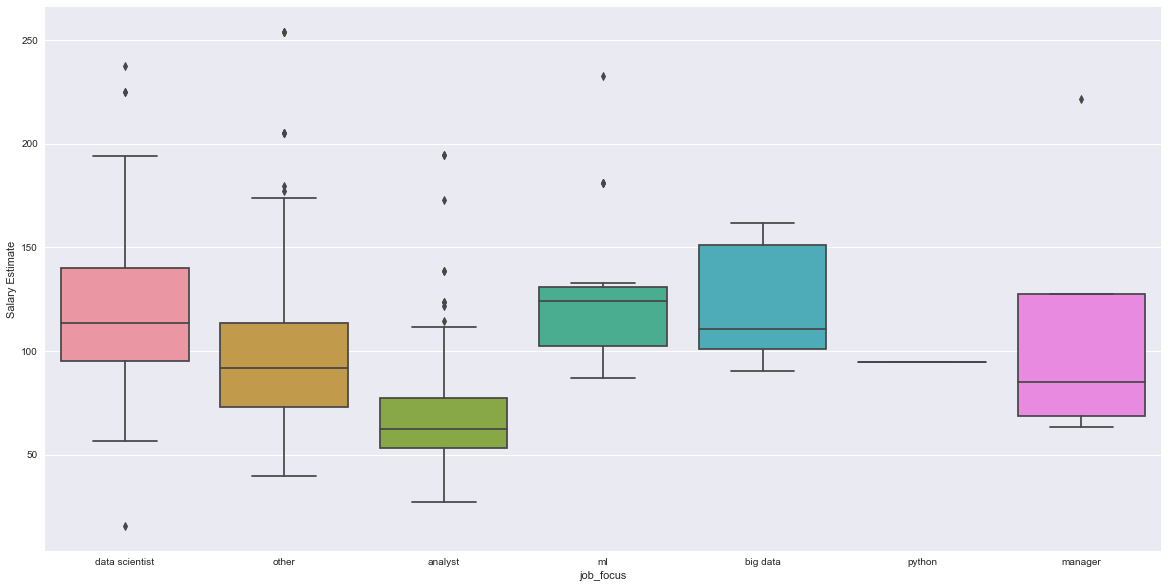

In [63]:
plt.figure(figsize = (20 , 10))
sns.boxplot(y = "Salary Estimate", x = "job_focus", data = df)
plt.show()

<AxesSubplot:xlabel='Salary Estimate', ylabel='Count'>

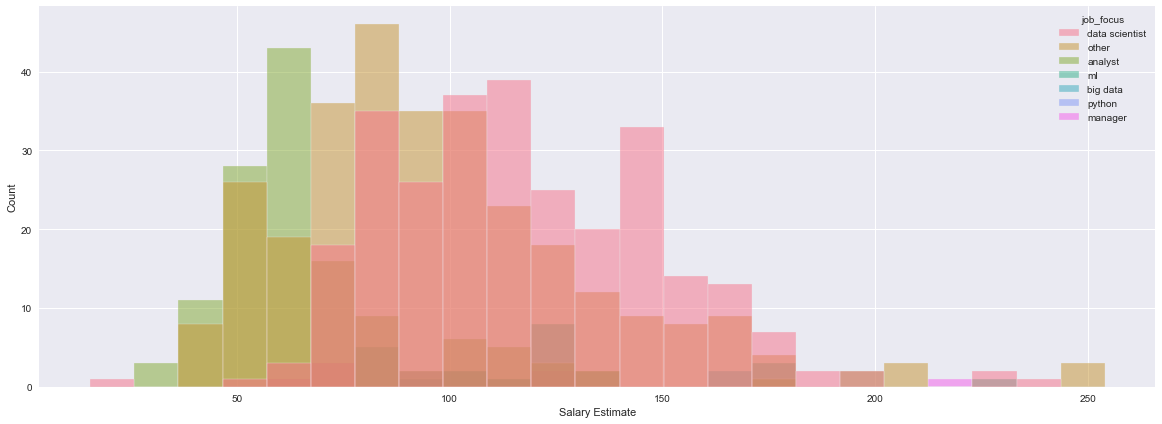

In [64]:
plt.figure(figsize = (20 , 7))
sns.histplot(data=df,x="Salary Estimate",hue="job_focus")

## Experience, Job title and Salary

In [65]:
df.groupby(["job_focus","experience"]).mean()["Salary Estimate"].to_frame()

Salary Estimate
job_focus      experience                 
analyst        junior            48.600000
               other             63.882716
               senior            83.677778
big data       other            103.000000
               senior           142.333333
data scientist junior            89.500000
               other            110.642487
               senior           134.674699
manager        senior           105.937500
ml             other            126.218750
               senior           127.000000
other          junior            62.500000
               other             86.745098
               senior           123.931818
python         senior            94.500000

<AxesSubplot:xlabel='job_focus', ylabel='Salary Estimate'>

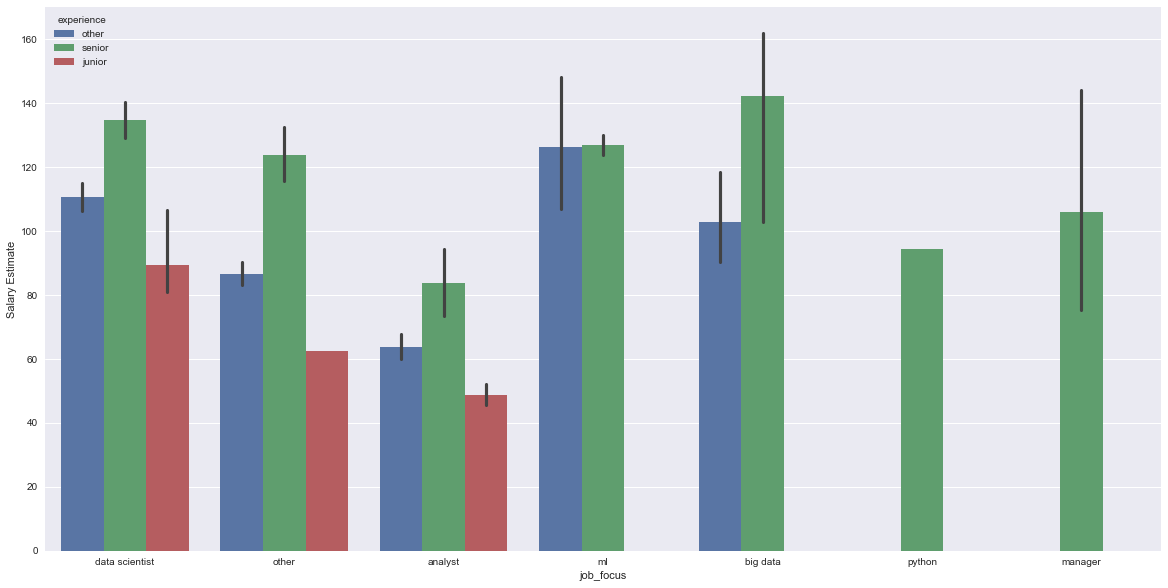

In [66]:
plt.figure(figsize = (20 , 10))
sns.barplot(x="job_focus",y="Salary Estimate",hue="experience",data=df)

## Type of Ownership

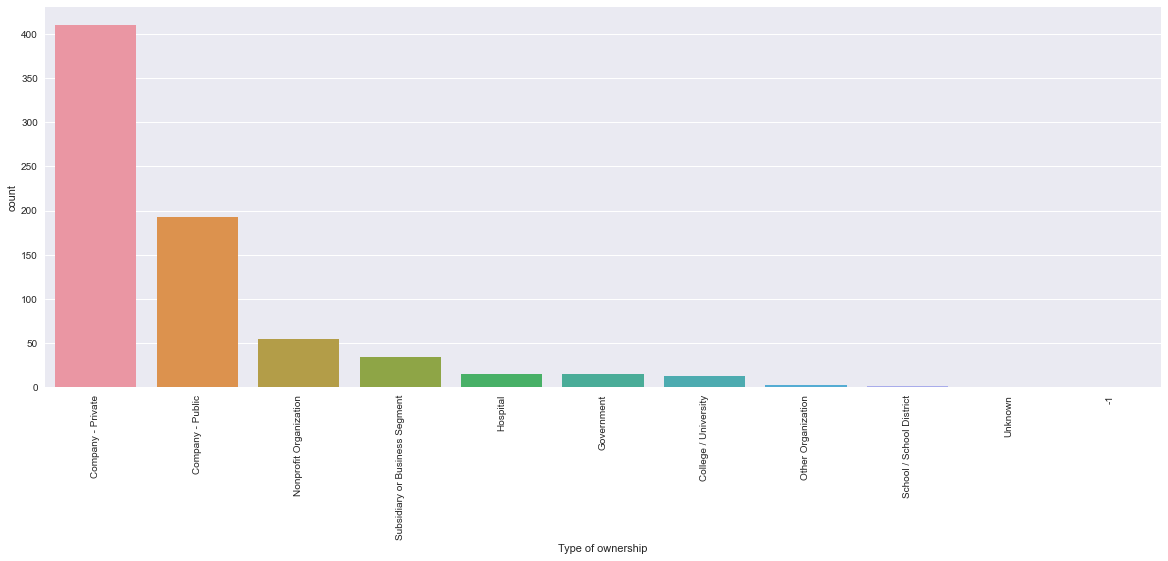

In [67]:
plt.figure(figsize = (20 , 7))
c = sns.countplot(df["Type of ownership"],order = df['Type of ownership'].value_counts().index)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
plt.show()

<AxesSubplot:ylabel='Type of ownership'>

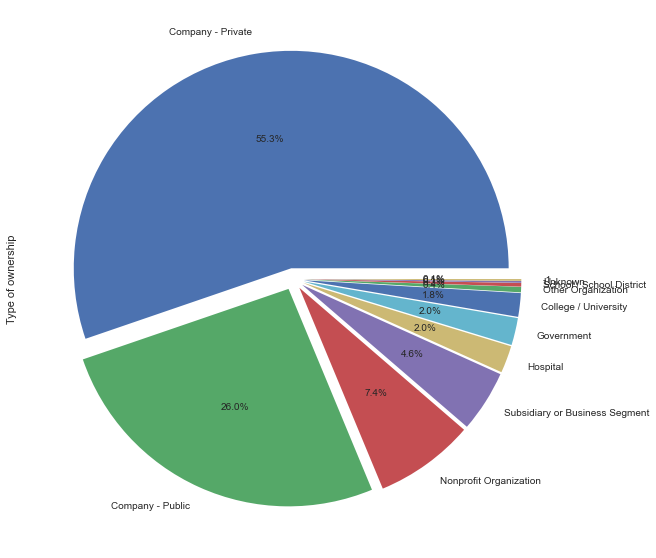

In [68]:
plt.figure(figsize = (20 , 10))
df["Type of ownership"].value_counts().plot.pie(autopct='%1.1f%%',explode=(0.05,0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05,0.05,0.05,0.05))

Most of the job postings are done by Private company

## Type of Ownership and Salary

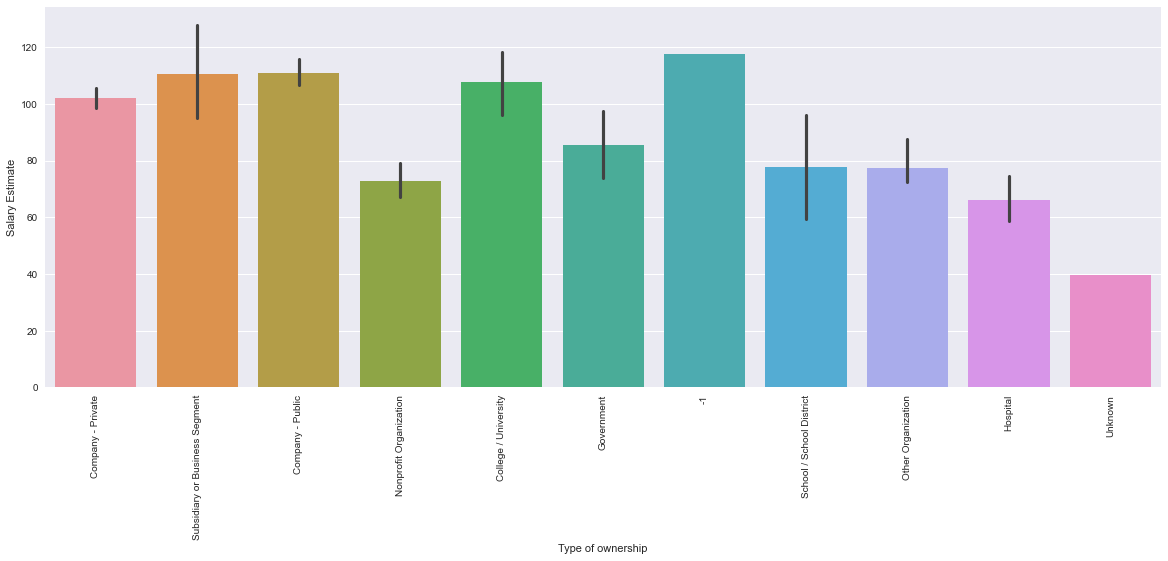

In [69]:
plt.figure(figsize = (20 , 7))
c = sns.barplot(x="Type of ownership",y="Salary Estimate",data=df.sort_values("Salary Estimate", ascending = False))
c.set_xticklabels(c.get_xticklabels(),rotation=90)
plt.show()

## Sector

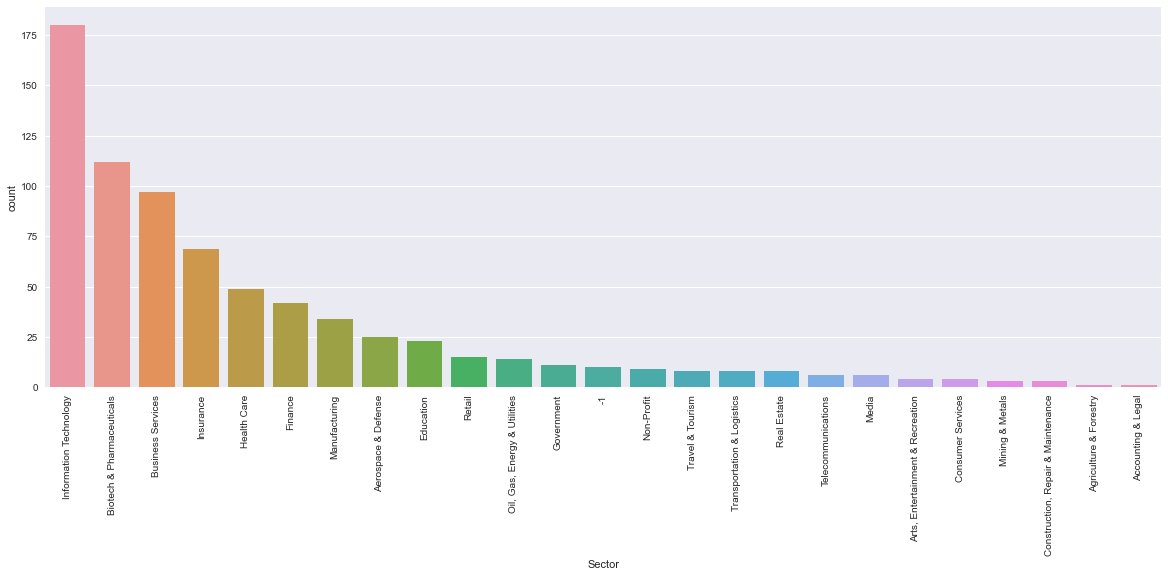

In [70]:
plt.figure(figsize = (20 , 7))
c = sns.countplot(df["Sector"],order = df['Sector'].value_counts().index)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
plt.show()

IT companies require more Data scientists related employers

## Sector and Salary

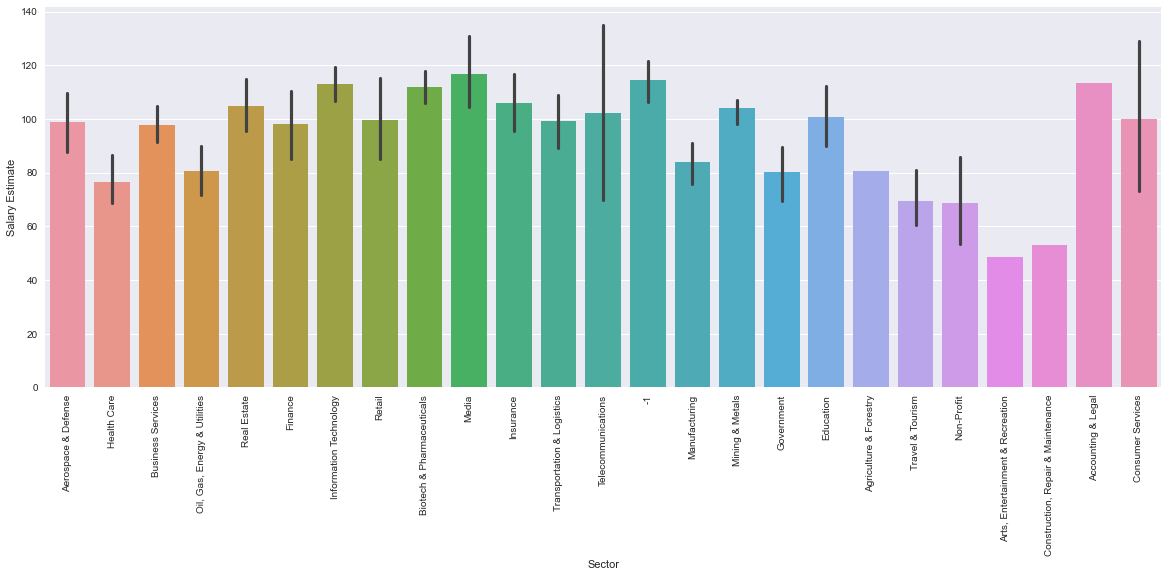

In [71]:
plt.figure(figsize = (20 , 7))
c = sns.barplot(x="Sector",y="Salary Estimate",data=df)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
plt.show()

# Model Building 

In [72]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hour', 'year', 'code', 'head_state', 'Job_len', 'python', 'aws',
       'azure', 'visualization', 'analysis', 'excel', 'bi', 'job_focus',
       'experience'],
      dtype='object')

'Rating',
       , 'Location',  'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hour', 'year', 'code', 'head_state', 'Job_len', 'python', 'aws',
       'azure', 'visualization', 'analysis', 'excel', 'bi', 'job_focus',
       'expeirence'

In [73]:
X = df[['Rating',
         'Size', 
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 
       'hour', 'year', 'code', 'head_state', 'Job_len', 'python', 'aws',
       'azure', 'visualization', 'analysis', 'excel', 'bi', 'job_focus',
       'experience']]
y = df["Salary Estimate"]

## Creating Dummy Variable

In [74]:
X = pd.get_dummies(X)

In [75]:
X

,Rating,hour,year,head_state,Job_len,python,aws,azure,visualization,analysis,...,job_focus_analyst,job_focus_big data,job_focus_data scientist,job_focus_manager,job_focus_ml,job_focus_other,job_focus_python,experience_junior,experience_other,experience_senior
0,3.8,0,48,0,2517,1,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
1,3.4,0,37,0,4738,1,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
2,4.8,0,11,1,3427,1,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
3,3.8,0,56,1,3840,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,2.9,0,23,1,2708,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,3.9,0,191,0,6105,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
738,4.4,0,15,0,6093,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
739,2.6,0,37,1,3049,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
740,3.2,0,-1,0,1606,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## Splitting into Train and Test Set

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [78]:
mae=[]
algo=[]

## Linear Regression

MAE: 20.649289446815185


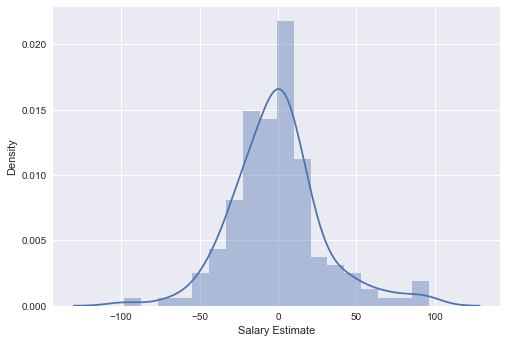

In [79]:
linear = LinearRegression()
linear.fit(X_train,y_train)
linear_predict = linear.predict(X_test)
algo.append(str(linear))
mae.append(metrics.mean_absolute_error(y_test, linear_predict))
print('MAE:', metrics.mean_absolute_error(y_test, linear_predict))
sns.distplot(y_test-linear_predict)
plt.show()

## Lasso Regression

MAE: 22.8835304367422


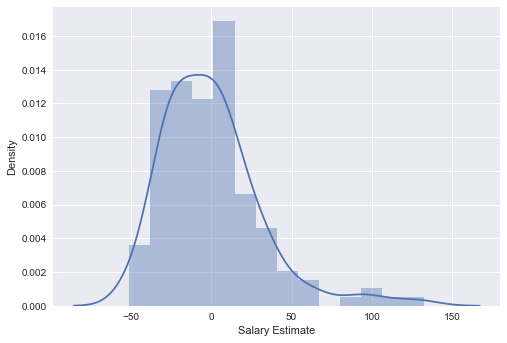

In [80]:
linear = Lasso()
linear.fit(X_train,y_train)
linear_predict = linear.predict(X_test)
algo.append(str(linear))
mae.append(metrics.mean_absolute_error(y_test, linear_predict))
print('MAE:', metrics.mean_absolute_error(y_test, linear_predict))
sns.distplot(y_test-linear_predict)
plt.show()

## Ridge Regression Own Method

In [81]:
class RidgeRegression:

    def __init__(self,  alpha=0.6, learning_rate=0.001, max_iter=3000):
        self.miter = max_iter
        self.penalty = alpha
        self.lr = learning_rate
        
    def fit(self, X, y) :
        self.weights = np.random.randn(X.shape[1])
        self.bias = 1

        for i in range(self.miter):
            y_hat = self.predict(X)
            new_bias = -2*np.sum(y - y_hat)/X.shape[0]  
            new_weights = (-(2*(X.T).dot(y - y_hat)) + (2*self.penalty*self.weights))/X.shape[0]
            self.bias =  self.bias - self.lr*new_bias
            self.weights =  self.weights - self.lr*new_weights

    def predict(self, X):
        p = np.dot(X, self.weights) + self.bias
        return p

MAE: 20.36910730429192


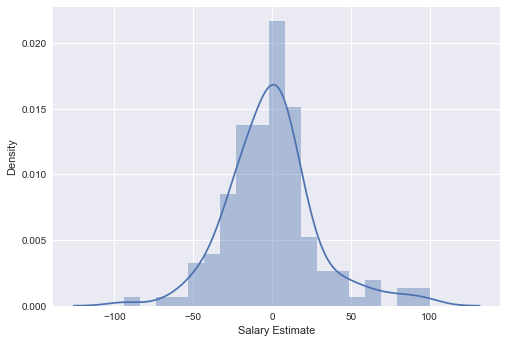

In [82]:
linear = RidgeRegression()
linear.fit(X_train_scaled,y_train)
linear_predict = linear.predict(X_test_scaled)
algo.append(str("Ridge_Own_Version"))
mae.append(metrics.mean_absolute_error(y_test, linear_predict))
print('MAE:', metrics.mean_absolute_error(y_test, linear_predict))
sns.distplot(y_test-linear_predict)
plt.show()

## Ridge

MAE: 20.341668405360302


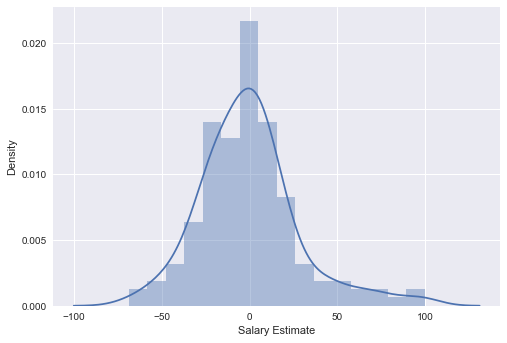

In [83]:
linear = Ridge()
linear.fit(X_train,y_train)
linear_predict = linear.predict(X_test)
algo.append(str(linear))
mae.append(metrics.mean_absolute_error(y_test, linear_predict))
print('MAE:', metrics.mean_absolute_error(y_test, linear_predict))
sns.distplot(y_test-linear_predict)
plt.show()

## Ridge Regression with different alpha

In [84]:
alpha_list = []
diff_alpha_error = []
for i in range(1,30):
    i = i/10
    alpha_list.append(i)
    linear = Ridge(alpha=i)
    linear.fit(X_train,y_train)
    linear_predict = linear.predict(X_test)
    diff_alpha_error.append(metrics.mean_absolute_error(y_test, linear_predict))

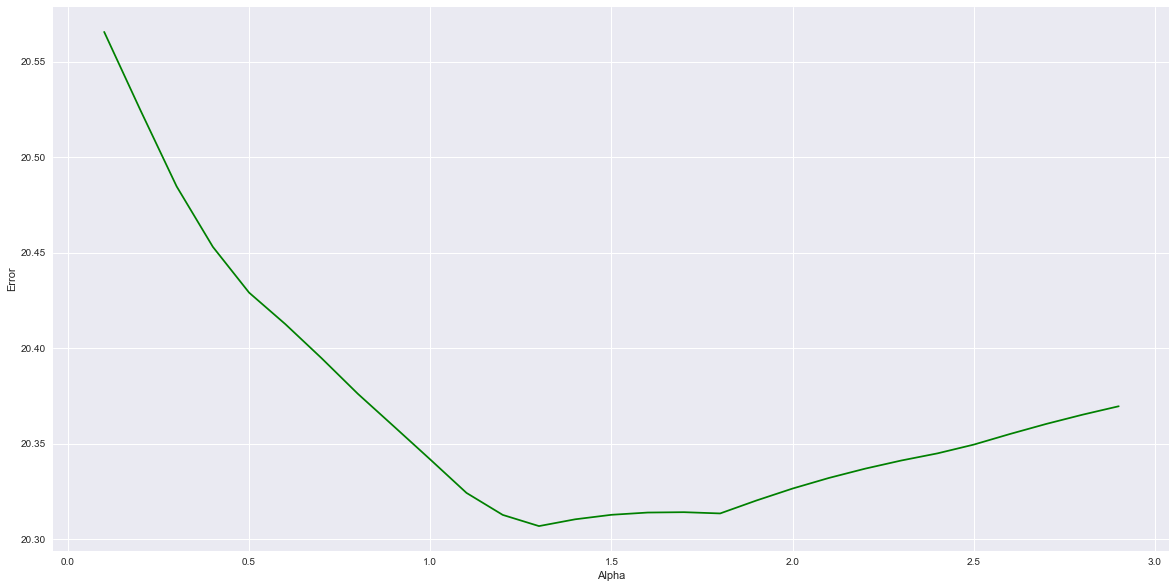

In [85]:
plt.figure(figsize = (20 , 10))
plt.plot(alpha_list,diff_alpha_error,"g-")
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.show()

## Elastic Net

MAE: 20.54060071763065


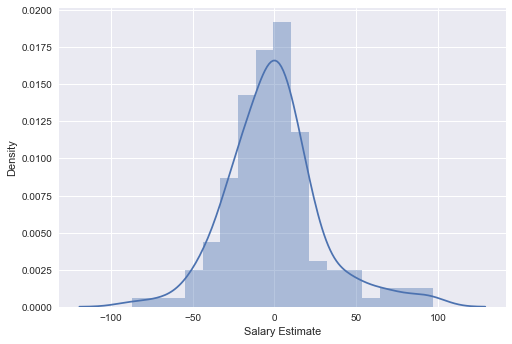

In [86]:
linear = ElasticNet(alpha=0.0005, l1_ratio=0.5)
linear.fit(X_train,y_train)
linear_predict = linear.predict(X_test)
algo.append(str(linear))
mae.append(metrics.mean_absolute_error(y_test, linear_predict))
print('MAE:', metrics.mean_absolute_error(y_test, linear_predict))
sns.distplot(y_test-linear_predict)
plt.show()

## Decision Tree

MAE: 9.687919463087248


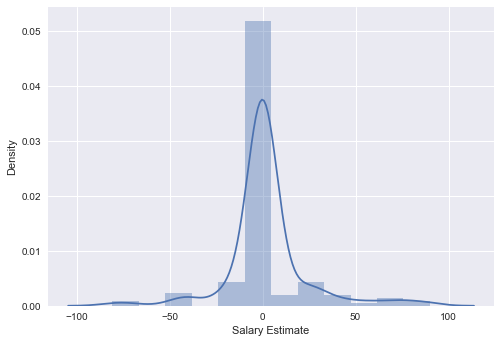

In [87]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)
algo.append(str(dt))
mae.append(metrics.mean_absolute_error(y_test, dt_predict))
print('MAE:', metrics.mean_absolute_error(y_test, dt_predict))
sns.distplot(y_test-dt_predict)
plt.show()

## Random Forest

MAE: 11.72953020134228


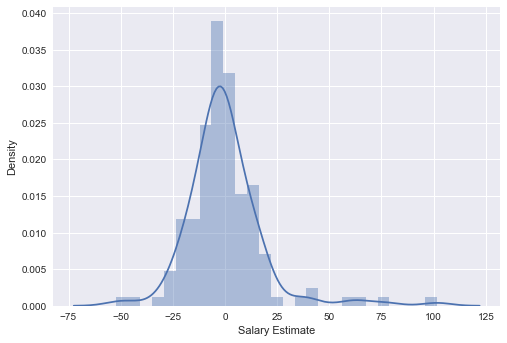

In [88]:
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)
algo.append(str(dt))
mae.append(metrics.mean_absolute_error(y_test, linear_predict))
print('MAE:', metrics.mean_absolute_error(y_test, dt_predict))
sns.distplot(y_test-dt_predict)
plt.show()

## KernelRidge

MAE: 20.49164529946419


<AxesSubplot:xlabel='Salary Estimate', ylabel='Density'>

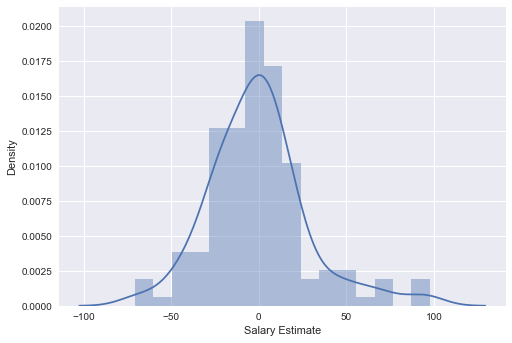

In [89]:
from sklearn import metrics
linear = KernelRidge(alpha=0.5)
linear.fit(X_train,y_train)
linear_predict = linear.predict(X_test)
algo.append(str(linear))
mae.append(metrics.mean_absolute_error(y_test, linear_predict))
print('MAE:', metrics.mean_absolute_error(y_test, linear_predict))
sns.distplot(y_test-linear_predict)

MAE: 16.82392058460743


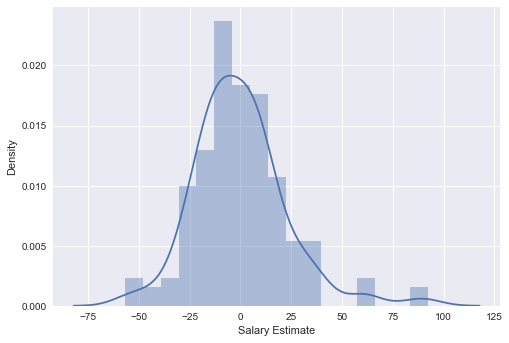

In [90]:
from sklearn.ensemble import GradientBoostingRegressor
gdb = GradientBoostingRegressor()
gdb.fit(X_train,y_train)
gdb_predict = gdb.predict(X_test)
algo.append(str(gdb))
mae.append(metrics.mean_absolute_error(y_test, gdb_predict))
print('MAE:', metrics.mean_absolute_error(y_test, gdb_predict))
sns.distplot(y_test-gdb_predict)
plt.show()

## Comparing Algorithms

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
data_algo_error = {'Algorithm':algo,'MAE':mae}
algo_df = pd.DataFrame(data_algo_error)

In [93]:
algo_df.sort_values(by=['MAE'], inplace=True)
algo_df

,Algorithm,MAE
5,DecisionTreeRegressor(),9.687919
8,GradientBoostingRegressor(),16.823921
3,Ridge(),20.341668
2,Ridge_Own_Version,20.369107
7,KernelRidge(alpha=0.5),20.491645
4,ElasticNet(alpha=0.0005),20.540601
6,RandomForestRegressor(),20.540601
0,LinearRegression(),20.649289
1,Lasso(),22.883530


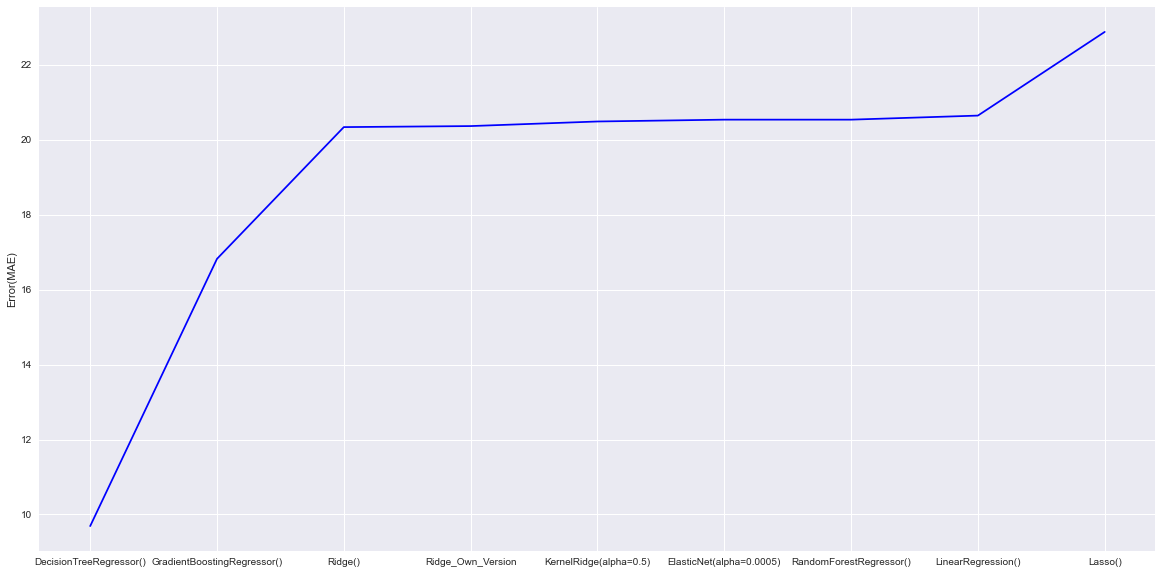

In [97]:
plt.figure(figsize = (20 , 10))
plt.plot(algo_df["Algorithm"],algo_df["MAE"],"b")
plt.ylabel("Error(MAE)")
plt.show()